# Chaines de Markov et épidémiologie :
## propagation d’une épidémie dans une population

### Packages :

In [1]:
# Les packages random et matplotlib sont conseillés.
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy, deepcopy
from collections import Counter

## 1 Description du modèle

#### 1. Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états. Vérifiez que cette matrice est stochastique

In [2]:
# A la matrice de transition 
# P(2,2) = 1 ; P(0,1) = 0.08 ; P(0,0) = 0.92 ; P(1,1) = 0.93 ; P(1,2) = 0.07 ; P(0,2) = P(1,0) = P(2,0) = P(2,1) = 0
# Avec: P -> la proba ; 0 -> l'etat S ; 1 -> l'etat I ; 2 -> l'etat R
A = np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
print(A)


[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


C'est une matrice carrée (1)

0.92 + 0.08 + 0 = 0 + 0.93 + 0.07 = 0 + 0 + 1 = 1 

Alors la somme de chaque ligne vaut 1 (2) 

Donc  d'après (1) et (2) cette matrice est stochastique

#### 2. Créez Π0 la distribution de probabilité initiale.

In [3]:
P_s = 0.9 # Un individu a une probabilité de 0.9 d’être sain
P_i = 0.1 # 0.1 d’être infecté
P_r = 0 # Alors une probabilité de 0 qu'il soit guéri
pi0 = [P_s, P_i, P_r] # Distribution de la probabilité initale
print(pi0)

[0.9, 0.1, 0]


### Tirage aléatoire des états

In [4]:
def picker(p, list_AZ,list_SZ):
    """
    Fonction implémenter pour l'utilisation en initialStatePicker et nextStatePicker,
    elle choisit l'état prochain en se basant sur la probabilité générer et la liste extraite de la matrice.
    
    *les parametres
     p : la probabilité aléatoire ; int.
     list_AZ : la liste complete extraite de la matrice; tab[float]
     list_SZ : la liste list_AZ sans les zeros; tab[float] 
     
     *le return: 
     l'index de l'etat choisi; int .
    """
    
    repetitions = Counter(list_SZ) #un dictionnaire où nous mettons les valeurs de la liste avec leurs repetitions 
    # Exemple : [0.5 0.5 0] -> {0.5 : 2 , 0 : 1}
    # Nous applicons ca sur la liste sans les zeros pour des raisons de facilité de calcul et d'optimisation

    minimum = min(list_SZ) # Le minimum de la liste sans les zeros 
                            # afin que nous prenons pas les 0 mais la valeur qui est juste supérieur 
    
    
    list_min = [cpt for cpt, n in enumerate(list_AZ) if n == minimum] # Nous mettons toutes ses positions dans une liste 

    if (p > 0) and (p <= (minimum * 100)) : # Exemple [0.91 0.08 0.01] P devra etre entre 0 et 0.01*100=10%
        if repetitions[minimum] > 1 : # Si la valeur existe plus qu'une fois dans la liste
            index = list_min[0] # Nous prenons la premiere position vu que c'est la premiere fois que nous voyons la valeur
        else :    
            index = list_AZ.index(minimum) # Sinon nous prenons directement l'indice de la valeur vu que la fonction index
                                            # prend que la premiere position de la valeur dans la liste
        return index 
        
    list_SZ.remove(minimum) # Il faut enlever la valeur de la liste sans les 0
    minimum2 = min(list_SZ) # pour trouver le nouveau minimum
    
    
    list_min2 = [cpt for cpt, n in enumerate(list_AZ) if n == minimum2]
    
    if (p > minimum) and (p <= (minimum * 100 + minimum2 * 100)) :
        if repetitions[minimum2] > 1 : 
            if list_min2 == list_min : 
                index = list_min[1] # maintenant si nous voyons la valeur pour la deuxieme fois nous prenons 
                                    # sa deuxième position
            # Et ainsi de suite pour le reste du code de cette fonction, le reste suit le meme logique .
            else :
                index = list_min2[0]   
        else :
            index = list_AZ.index(minimum2)
        return index
        
    list_SZ.remove(minimum2)
    reste = list_SZ[0]
    
    list_reste = [cpt for cpt, n in enumerate(list_AZ) if n == reste]
    
    if (p > (minimum * 100 + minimum2 * 100)) and (p <= 100) :
        if repetitions[reste] > 1 : 
            if list_reste == list_min2 :
                if  list_min2 != list_min : 
                    index = list_min2[1]
                else :
                    index = list_min2[2]
            elif liste_reste == liste_min :
                if liste_min != liste_min2 :
                    index = liste_min[1]
                else :
                    index = liste_min[2]
        else :
            index = list_AZ.index(reste)
    
    return index

In [5]:
def initialStatePicker(p, dist_proba_init):
    """
    Fonction implémenter pour l'utilisation en generateRandomSequence, 
    elle trouve l'état initial choisi a travers de la probabilité aléatoire et la distribution initiale des probabilités.
    
    *les parametres
     p : la probabilité aléatoire ; int.
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     
    *le return : 
     Retourne la valeur clé de l'état.
    
    """
    
    # Nous choisissons un état initial aléatoire en tenant compte de la distribution de la probabilité initiale [A, B, C]
    # c'est a dire l'etat initial peut etre soit un S avec une proba de A soit un I avec une proba de B our R avec une proba
    # de C si nous trouvons 0 c'est a dire une proba nul nous recherchons du nouveau un nouveau 
    # état initial qui est différent de l'etat qui lui correspond .
    
    
    list_SZ = [s for s in dist_proba_init if s != 0] # la liste de la matrice des distributions initial sans les 0 
    
    i = picker(p, dist_proba_init, list_SZ)
    return i

In [6]:
def nextStatePicker(pre, p, matrice_transition):
    """
    Fonction implémenter pour l'utilisation en GenerateRandomSequence,
    elle trouve l'etat suivant a partir de : l'etat precedent, la probabilité aléatoire et la matrice des transitions.
    
    *les parametres:
     pre : l'etat precedent ; int .
     p : la probabilité aléatoire ; int.
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return:
      Retourne la valeur clé de l'etat suivant.
      
    """
    
    #precendent -> transition proba / reboucle -> etat suivant


    matrix = deepcopy(matrice_transition) # copie temporaire
    list_AZ = [s for s in matrix[pre]] #nous prenons la liste avec l'indice du precedent 
    list_SZ = [s for s in matrix[pre] if s != 0] # la liste de la matrice avec l'indice du precedent sans les 0 .
    i = picker(p, list_AZ, list_SZ)
    return i

In [7]:
def generateRandomSequence(T, dist_proba_init, matrice_transition):
    """
    génére une séquence aléatoire de taille T en utilisant cette chaîne de Markov.
    
    *les parametres:
     T : la longeur de la chaine générer; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
    *le return :
     Retourne une sequence genere aleatoirement de taille T; str .
    
    """
    
    #SIR : dict[int:str] 
    SIR = {0 : "S", 1 : "I", 2 : "R"} 
    
    #random_sequence : str  
    random_sequence = "" # Initalisation de la sequence vide, nous allons concatener dedans la sequence a retourner .
    
    # Nous choisissons un état initial aléatoire en tenant compte de la distribution de la probabilité initiale [A, B, C]
    # c'est a dire l'etat initial peut etre soit un S avec une proba de A soit un I avec une proba de B 
    # si nous trouvons 0 c'est a dire  avec une proba nul nous recherchons du nouveau un nouveau 
    # état initial qui est différent de l'etat qui a une proba 0 s'il existe.
    proba = np.random.randint(0,100)
    while proba == 0 : # 0%
        proba = np.random.randint(0,100)
    i = initialStatePicker(proba,dist_proba_init)
    
    # Nous insérons le nom de l'etat initial trouvé dans le dictionnaire DIR a partin de sa clé dans
    # le début de la séquence aléatoire. Et nous stockons cet clé dans une variable "precedent" pour pouvoir l'accéder après .
    random_sequence = random_sequence + SIR.get(i) 
    precedent = i # Après, "precedent" devient figurativement le état_i-1 (état precedent) . 
    
    
    
    
    # La boucle dans laquelle nous trouvons les états aléatoirement en tenant compte des probabilités
    # de la matrice des transitions .
    for j in range(1,T):
        # Quand l'indice [precedent,i] = 0 sa probabilité dans la matrice des transitions et nulle
        # c'est a dire la probabilité de i sachant precedent vaut 0, donc la transition qui relie les deux états precedent et i 
        # est inexistante, ce qui nous ramène a rechercher alèatoirement de nouveau un autre état.
        proba = np.random.randint(0,100)
        while (proba == 0) : 
            proba = np.random.randint(0,100)
        
        i = nextStatePicker(precedent,proba,matrice_transition)
   
        precedent = i 
        random_sequence = random_sequence + SIR.get(i) #concatenation des états avec les états precedents .
        
    return random_sequence

# T = 50
print(generateRandomSequence(50, pi0, A))


SIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIRRRRRRRR


### Modélisation d’une population

#### 1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l’évolution du nombre d’individus dans les trois états en fonction du temps

In [8]:
def GenerateRandomPS(population, t, dist_proba_init, matrice_transition):
    """
    Generate Random Population Sequences
    Génére des séquences aléatoires de taille T sur toute la population en utilisant le GenerateRandomSequence
    
    *les parametres:
     population : le nombre d'invididus dans une population; int .
     t : la longeur de la chaine générer pour une sequence ET le temps; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return : 
     Retourne un dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé
     correspont a l'etat (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .

    
    
    """
    
    # Nous prenons t comme la longeur de la sequence ainsi que le temps parceque chaque etat de la sequence 
    # correspond a un temps qui est égale a son index dans la chaine . 
    
    random_sequence = "" # Initalisation de la sequence vide, nous allons generer dedans chaque
                        # sequence afin de l'inserer dans le dictionnaire du return .

    # Initialisation du dictionnaire des états dict[int : dict[str:int]] .
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 

        
    # Pour chaque individu de la population proposé, nous appliquons la fonction generateRandomSequence pour lui génerer
    # une séquence d'état aléatoire de taille T qui se base sur la distribution initial et la matrice des transitions
    # après nous vérifiant pour chaque caractere de la sequence générer l'état qui la correspond
    # afin d'incrémenter son compteur correspondant qui correspond au nombre d'invidus dans l'état trouvé .
    
    for individu in range(population): 
        random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition) 
        
        for etat_i in range(len(random_sequence)): 
            if random_sequence[etat_i] == "S": 
                states[etat_i]["S"] += 1 
            elif random_sequence[etat_i] == "I": 
                states[etat_i]["I"] += 1 
            else:
                if random_sequence[etat_i] == "R": 
                    states[etat_i]["R"] += 1 
    
    return states


In [9]:
# population = 20000 ; t = 50 
generated = GenerateRandomPS(20000, 50, pi0, A)

print(generated)

{0: {'S': 17990, 'I': 2010, 'R': 0}, 1: {'S': 16605, 'I': 3254, 'R': 141}, 2: {'S': 15256, 'I': 4379, 'R': 365}, 3: {'S': 14040, 'I': 5302, 'R': 658}, 4: {'S': 12929, 'I': 6041, 'R': 1030}, 5: {'S': 11866, 'I': 6685, 'R': 1449}, 6: {'S': 10926, 'I': 7149, 'R': 1925}, 7: {'S': 10063, 'I': 7465, 'R': 2472}, 8: {'S': 9267, 'I': 7765, 'R': 2968}, 9: {'S': 8496, 'I': 8009, 'R': 3495}, 10: {'S': 7785, 'I': 8142, 'R': 4073}, 11: {'S': 7152, 'I': 8240, 'R': 4608}, 12: {'S': 6561, 'I': 8211, 'R': 5228}, 13: {'S': 6062, 'I': 8155, 'R': 5783}, 14: {'S': 5601, 'I': 8022, 'R': 6377}, 15: {'S': 5158, 'I': 7887, 'R': 6955}, 16: {'S': 4721, 'I': 7811, 'R': 7468}, 17: {'S': 4337, 'I': 7667, 'R': 7996}, 18: {'S': 3973, 'I': 7502, 'R': 8525}, 19: {'S': 3665, 'I': 7289, 'R': 9046}, 20: {'S': 3386, 'I': 7063, 'R': 9551}, 21: {'S': 3112, 'I': 6860, 'R': 10028}, 22: {'S': 2862, 'I': 6625, 'R': 10513}, 23: {'S': 2632, 'I': 6387, 'R': 10981}, 24: {'S': 2427, 'I': 6129, 'R': 11444}, 25: {'S': 2240, 'I': 5889, '

In [10]:
def graphSIR(dic, t) :
    """
    
    Affichage de l'évolution du nombre d'individus dans les trois états en fonction du temps en utilisant 
    le dictionnaire générer par GenerateRandomPS
    
    *les parametres : 
    dic : dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé correspont a l'etat
          (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
    t : la longeur de la chaine générer pour une sequence ET le temps; int .

    
    """

    temps = [i for i in range(t)] # intervalle de temps ([0,T[)
    # Des listes S I R pour les intervalles des nombres d'individus de la population dans chaque état. 
    S = [dic[t]["S"] for t in dic]
    I = [dic[t]["I"] for t in dic]
    R = [dic[t]["R"] for t in dic]

    #Tracage des courbes, nous utilisons les labels exactes utilisé dans le sujet .
    plt.plot(temps, S, label="sain.e.s")
    plt.plot(temps, I, label="infecte.e.s")
    plt.plot(temps, R, label="gueri.e.s")
    plt.legend()
    plt.title("Nombre d'individus dans chaque état en fonction du temps", loc='center')
    plt.xlabel("Temps")
    plt.ylabel("Nombre de personnes dans chaque catégorie")

    plt.show()


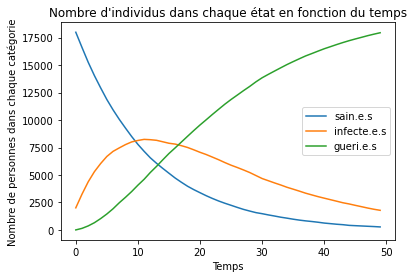

In [11]:
# T = 50
graphSIR(generated,50)

#### 2. Quand t est grand, quel est la proportion d’individus sains, infectés et guéris ?

In [12]:
def percentage(part, whole):
    """
    Fonction de pourcentage utilisé dans la fonction de proportion.
    
    *les parametres:
    part : dans cet exemple c'est le nombre de gens infecté; int
    whole : dans cet exemple c'est la population; int 
    
    *le return:
    le pourcentage; float 
    
    """
    return 100 * part/whole


In [13]:
def proportion(dic, t, whole):
    """
    La proportion d’individus sains, infectés et guéris.
    *les parametres:
    dic : dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé correspont a l'etat
          (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
    t : le temps ; int
    whole : dans cet exemple c'est la population; int
    
    """
    sains = percentage(dic[t-1]["S"],whole)
    infectes = percentage(dic[t-1]["I"],whole)
    gueris = percentage(dic[t-1]["R"],whole)
    print("Sains : ",sains, "% -- Infectés : ", infectes, "% -- Guéris : ", gueris, "%")

Pour T = 50 comme sur le sujet :

In [14]:
proportion(generated, 50, 20000)

Sains :  1.36 % -- Infectés :  8.92 % -- Guéris :  89.72 %


T est grand :
Nous prenons T = 500

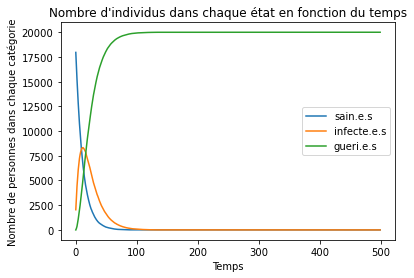

In [15]:
generatedTgrand = GenerateRandomPS(20000, 500, pi0, A)
graphSIR(generatedTgrand,500)

In [16]:
proportion(generatedTgrand, 500, 20000)

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %


### Pic de l’épidémie

#### Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [17]:
def dicPic(dic, t, state):
    """
    Fonction utilser dans la fonction pic
    Prend le dictionnaire et trouve le plus grand I avec son t correspondant
    
    *les parametres:
    dic : dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé correspont a l'etat
          (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
    t : le temps ; int
    state : l'état ; str
    
    *le return: 
    un dictionnaire contenent comme valeur le max de l'etat recherché et comme clé son temps
    """ 
    state_dic = {t:dic[t][state] for t in dic} #dictionnaire des états (en int) et leurs temps correspondant seulement
    max_value = max(state_dic.values()) #valeur max 
    max_key = 0 #début d'algo find key dans un dictionnaire
    for key, value in state_dic.items():
        if max_value == value : 
            max_key = key
            break #si nous trouvons la clé nous sortant de la boucle
    return {max_key : max_value}   

In [18]:
def pic(dic, t, state):
    """
    Trouve le nombre d'inividus infectés et le temps du pic a partir du dictionnaire extrait par la fonction dicPic
    
    *les parametres:
    dic : dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé correspont a l'etat
          (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
    t : le temps ; int
    state : l'état ; str
    
    """

    max_infectes = dicPic(dic, t, state) #le dic
    cle = list(max_infectes.keys()) #nous mettons le clé dans une liste pour le recupérer 
    valeur = list(max_infectes.values()) #nous mettons aussi la valeur dans une autre liste
    #recuperation: 
    temps = cle[0]
    nombre = valeur[0]
    
    print("Nombre d'invidus: ", nombre, "-- Le temps de production du pic : ", temps)

Nombre d'individus infectés et le temps du pic : 

In [19]:
pic(generated,50,"I")

Nombre d'invidus:  8240 -- Le temps de production du pic :  11


### Longueur de l’infection

#### 1. À partir des simulations, estimer la longueur moyenne d’une séquence de I

Moyenne pour un seul individu :

In [20]:
def moyenneInd(list_sequences, state):
    """
    Moyenne pour un seul idividu 
    
    *les parametres:
    list_sequences : list des séquences générer a partir de la fonction generateManySequences; tab[str]
    state : l'état ; str
    
    *le return: 
    la moyenne; float
    """
    somme_seq = 0
    somme_list = 0
    
    for sequence in list_sequences: 
        somme_seq = sequence.count(state) #nombre d'occurence de la chaine state dans la chaine sequence 
        somme_list += somme_seq #somme de toute les nombres occurences (somme_seq) dans la sommelist
    
    return somme_list/len(list_sequences)


In [21]:
def generateManySequences(T, dist_proba_init, matrice_transition, number):
    """
    Fonction qui généere plusieurs sequences et les stock dans une liste
    
    *les parametres:
     T : la longeur de la chaine générer; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float]
     number : nombre de séquences generer
    
    *le return:
     la liste des séquences génerer 
    """
    
    list_seq = []
    for i in range(number):
        new_seq = generateRandomSequence(T, dist_proba_init, matrice_transition) #generation d'une nouvelle sequence
        list_seq.append(new_seq) #sauvegarde de la sequence dans une liste avec les autres sequences
    return list_seq

In [22]:
listSq = generateManySequences(50, pi0, A, 100)
moyInd = moyenneInd(listSq, "I")
print("La longeur moyenne d'une séquence de I pour un individu est: ", moyInd)

La longeur moyenne d'une séquence de I pour un individu est:  12.12


Moyenne pour toute la population en fonction du temps : (Ce n'est pas demandé mais c'est juste pour observer)

In [23]:
def moyennePop(dic, t, state):
    stateList = [dic[t][state] for t in dic]
    return sum(stateList)/len(stateList)

In [24]:
moyPop = moyennePop(generated,50,"I")
print("La longeur moyenne d'une séquence de I dans la population est: ", moyPop)

La longeur moyenne d'une séquence de I dans la population est:  5170.6


#### 2. Calculer théoriquement la longueur d’une séquence de I en fonction de la probabilité de rester infecté, si on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique)

C'est l'espérence de la loi géométrique 1/p Alors 1/0.07 = 14.29 tentatives pour ne plus être infecté 
   Donc 14.29

## 2 Modèle ergodique

#### 1. Créez la nouvelle matrice de transition, et les nouvelles simulations, comment la population évoluet-elle si un individu guérit peut redevenir infecté ?

In [25]:
A1 = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
print(A1)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.04 0.   0.96]]


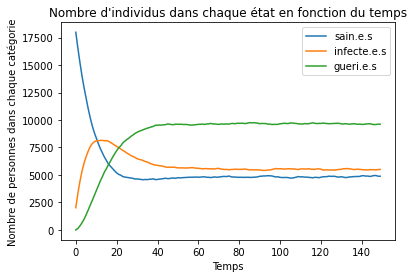

In [26]:
ergoDic = GenerateRandomPS(20000, 150, pi0, A1)
graphSIR(ergoDic, 150)

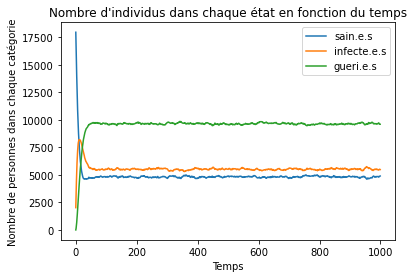

In [27]:
ergoDicGrand = GenerateRandomPS(20000, 1000, pi0, A1)
graphSIR(ergoDicGrand, 1000)

#### 2. Refaire les simulations avec une autre distribution de probabilité initiale, par exemple si au temps t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez vos observations.

Nous avons 90% d’infectés et 10% de sains : 

In [28]:
pi0_new = [0.1, 0.9, 0]
print(pi0_new)

[0.1, 0.9, 0]


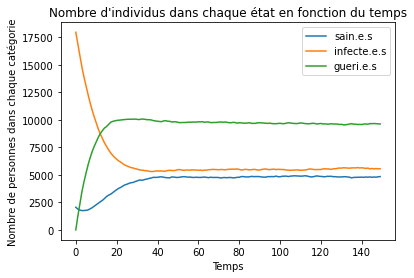

In [29]:
ergoDic_new = GenerateRandomPS(20000, 150, pi0_new, A1)
graphSIR(ergoDic_new, 150)

Autres initialisations : 

In [66]:
def randomInitialisations(number,pop,t):
    """
    Cette fonction genere aléatoirement des nouvelles distributions initiale et appelle la fonction graphSIR
    pour afficher leurs evolutions
    
    *les parametres:
     number : le nombre de distributions intiale que nous voulons génerer ; int
     pop : la population ; int
     t : le temps ; int
    
    """
    
    for i in range(number):    
        s = np.random.rand()
        i = np.random.rand()
        r = np.random.rand()
        pi0_random = [s, i, r]
        print ("Pour une distribution initial de ", s*100, "% sains, ", i*100, "% infectés et ", r*100, "% guéris")
        ergoDic_random = GenerateRandomPS(pop, t, pi0_random, A1)
        graphSIR(ergoDic_random, t)
        proportion(ergoDic_random, t, pop)
        pic(ergoDic_random,t,"I")
        print("\n")
    

Pour une distribution initial de  83.27510364245202 % sains,  39.073084195370015 % infectés et  76.68163306782886 % guéris


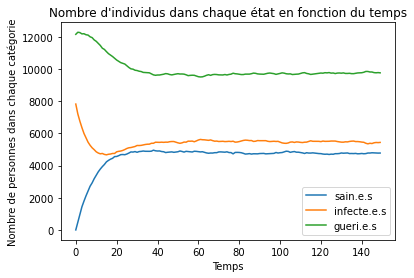

Sains :  23.915 % -- Infectés :  27.22 % -- Guéris :  48.865 %
Nombre d'invidus:  7830 -- Le temps de production du pic :  0


Pour une distribution initial de  37.629222809263716 % sains,  2.8722195581658228 % infectés et  41.21937084275651 % guéris


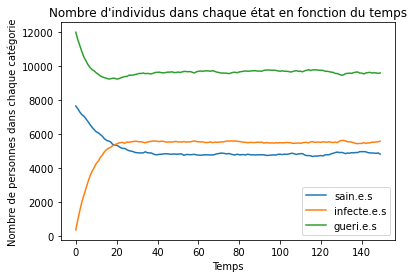

Sains :  24.135 % -- Infectés :  27.92 % -- Guéris :  47.945 %
Nombre d'invidus:  5632 -- Le temps de production du pic :  131


Pour une distribution initial de  5.770740681296338 % sains,  48.86229958104682 % infectés et  78.22660267620451 % guéris


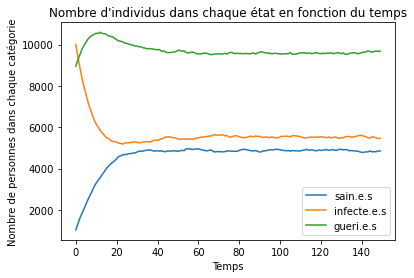

Sains :  24.245 % -- Infectés :  27.35 % -- Guéris :  48.405 %
Nombre d'invidus:  10003 -- Le temps de production du pic :  0


Pour une distribution initial de  59.99818302978256 % sains,  75.89210742625399 % infectés et  54.82159032647791 % guéris


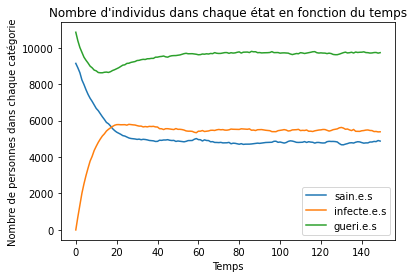

Sains :  24.39 % -- Infectés :  26.945 % -- Guéris :  48.665 %
Nombre d'invidus:  5798 -- Le temps de production du pic :  26


Pour une distribution initial de  15.949504090344192 % sains,  89.89632787749306 % infectés et  20.585980354382382 % guéris


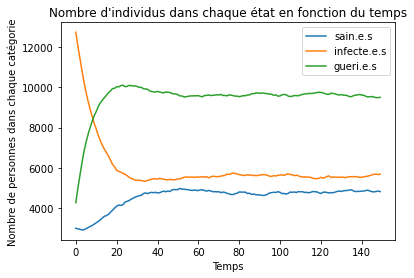

Sains :  24.09 % -- Infectés :  28.405 % -- Guéris :  47.505 %
Nombre d'invidus:  12739 -- Le temps de production du pic :  0




In [69]:
randomInitialisations(5,20000,150)

Nous pouvons toujours constater que les courbes se convergent vers les meme valeurs constantes meme si les distributions changent.

#### 3. Quels est la nature des états de cette chaine de Markov ? Est-elle périodique ? Est-elle irréductible ?

Une chaine de Markov est ergodique si et seulement si elle est irréductible,
apériodique et récurente positive.

#### 4. Calculer la distribution de probabilité stationnaire à partir de la matrice de transition et comparez ce résultat avec les simulations pour t assez grand.


pi . P = pi alors [0.24137931 0.27586207 0.48275862] ce qui est très proche des valeurs que nous trouvons

## 3 Modification du modèle : confinement

#### 1. Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Modifiez le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, et comparer les simulations au premier modèle.

In [32]:
A2 = np.array([[0.98,0.02,0],[0,0.93,0.07],[0,0,1]])
print(A2)

[[0.98 0.02 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


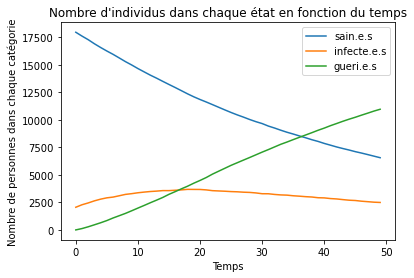

In [33]:
confinementDic = GenerateRandomPS(20000, 50, pi0, A2)
graphSIR(confinementDic, 50)

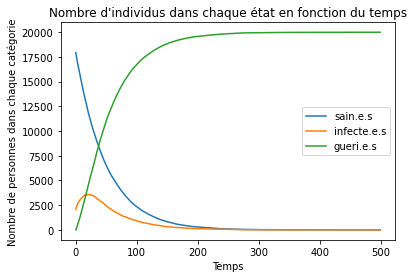

In [34]:
confinementDicGrand = GenerateRandomPS(20000, 500, pi0, A2)
graphSIR(confinementDicGrand, 500)

#### 2. Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.

In [35]:
pi0_conf = [1, 0, 0]

In [36]:
def confinement(population, t, dist_proba_init, matrice_transition_conf, matrice_transition_deconf):
    """
    Cette fonction merge et construit d'avantage sur les deux fonctions GenerateRandomPS (tirage aléatoire des états pour
    une séquence ) et GenerateRandomSequence (modélisation d'une population) en sorte qu'elle puisse 
    alterner entre les périodes et permuter entre les deux matrices confinement/déconfinement en fonction 
    des pourcentages pour trouver les états suivant
    
    *les parametres:
     population : le nombre d'invididus dans une population; int .
     t : la longeur de la chaine générer pour une sequence ET le temps; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition_conf : la matrice de transition de confinement
     matrice_transition_deconf : la matrice de transition de deconfinement
            **matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return : 
     Retourne un dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé
     correspont a l'etat (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
       
    
    """
    
    
    #dictionnaire des individus, clé l'index de l'invididu son numéro perso, valeur c'est la valeur qui correspond a l'état
    #la valeur de l'etat est imporante parce que nous avons besoin besoin d'elle lorsque nous choisissons l'etat suivant
    #pour chaque individu
    indiv = dict()
    for ind in range(population):
        indiv = {ind : 0}
    
    #dictionnaire SIR pour trouver après les états correspondant a leurs valeurs
    SIR = {0 : "S", 1 : "I", 2 : "R"}
    random_sequence = ""
    # Initialisation du dictionnaire des états dict[int : dict[str:int]] .
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 
       
    
    #les états initaux
    #a chaque tour de boucle sur population nous refons le calcul de proba aléa pour choisir l'etat initial de chaque
    #individu a partir de la distributions des probas initial et nous incrémentons le nombre des individus qui 
    #ont cette état dans le dictionnaire des état states
    for individu in range(population):
        proba = np.random.randint(0,100)
        while proba == 0 : 
            proba = np.random.randint(0,100)
        i = initialStatePicker(proba,dist_proba_init)
        indiv[individu] = i #nous indiquons que cet individu spécifique posséde cet état spécifique 
        statecase = SIR.get(i) #nous trouvons l'état qui correspond a la valeur a partir du dictionnaire SIR
        #incrementation
        if statecase == "S": 
            states[0]["S"] += 1 
        elif statecase == "I": 
            states[0]["I"] += 1 
        elif statecase == "R":
            states[0]["R"] += 1 
        
    
    # Boucle de 1 jusqu'au length de random sequence (1 parce que 0 est l'etat initial qui est déjà fini, 
    # et t = length de random sequence) , après,  boucle imbriqué sur la population pour trouver l'etat de 
    # chaque individu et faire des pourcentages précis pour savoir s'il faut se confiner/rester confiner (pourcentage 
    # infectés >= 30 sans confinement ou >=15 pendant le confinement)
    
    confinement = False
    
    
    for etat_i in range(1,t): 
        
        perc = percentage(states[etat_i - 1]["I"],population)
        
        for individu in range(population):
            
            if (perc >= 30) or ((perc >= 15) and (confinement)):
                confinement = True
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextStatePicker(indiv[individu],proba,matrice_transition_conf)
                indiv[individu] = i
                
                
                          
            elif (perc < 15) and (confinement):
                confinement = False
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextStatePicker(indiv[individu],proba,matrice_transition_deconf)
                indiv[individu] = i 
            
            else:
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextStatePicker(indiv[individu],proba,matrice_transition_deconf)
                indiv[individu] = i 
    
            statecase = SIR.get(i)
            if statecase == "S": 
                states[etat_i]["S"] += 1 
            elif statecase == "I": 
                states[etat_i]["I"] += 1 
            elif statecase == "R":
                states[etat_i]["R"] += 1
                
    return states

In [37]:
confDic = confinement(20000, 150, pi0_conf, A2, A)

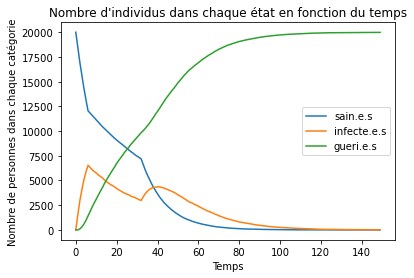

In [38]:
graphSIR(confDic, 150)

## 4 Optionnel

#### 1. Vous pouvez modifier : 
#### — la taille de la population ;
#### — la distribution de probabilité initiale ;
#### — les probabilité de transition pour voir comment cela va affecter la propagation de l’épidémie.

Confinement sur le modèle ergodique avec la distribution de probabalités initial de confinement : 

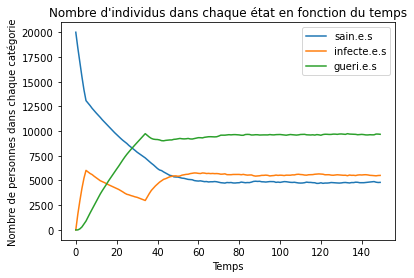

Sains :  24.045 % -- Infectés :  27.575 % -- Guéris :  48.38 %
Nombre d'invidus:  6023 -- Le temps de production du pic :  5


In [70]:
confErgo = confinement(20000, 150, pi0_conf, A2, A1)
graphSIR(confErgo, 150)
proportion(confErgo, 150, 20000)
pic(confErgo,150,"I")

Confinement sur le modèle ergodique avec une distribution de probabilités initial différente de celle du confinement :

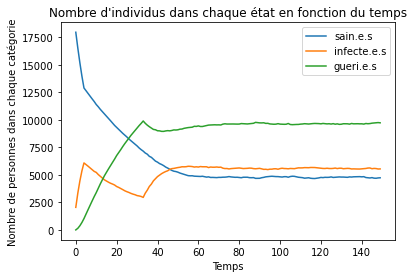

Sains :  23.67 % -- Infectés :  27.7 % -- Guéris :  48.63 %
Nombre d'invidus:  6083 -- Le temps de production du pic :  4


In [71]:
confErgo = confinement(20000, 150, pi0, A2, A1)
graphSIR(confErgo, 150)
proportion(confErgo, 150, 20000)
pic(confErgo,150,"I")

Modèle Ergodique sur une population moins large avec distribution de probabilités initial et matrice de confinement : 

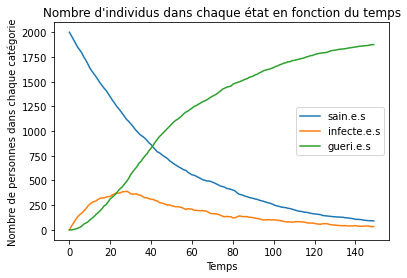

Sains :  4.55 % -- Infectés :  1.7 % -- Guéris :  93.75 %
Nombre d'invidus:  391 -- Le temps de production du pic :  28


In [72]:
dicErgo = GenerateRandomPS(2000, 150, pi0_conf, A2)
graphSIR(dicErgo, 150)
proportion(dicErgo, 150, 2000)
pic(dicErgo,150,"I")

Modèle Ergodique sur une population moins large avec distribution de probabilités initial et matrice de confinement avec plus de temps pour bien observer :

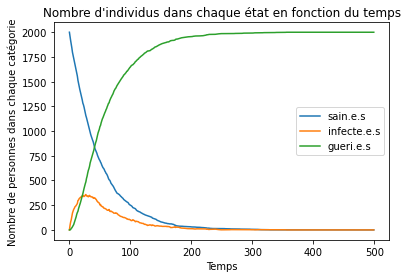

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %
Nombre d'invidus:  358 -- Le temps de production du pic :  27


In [73]:
dicErgo = GenerateRandomPS(2000, 500, pi0_conf, A2)
graphSIR(dicErgo, 500)
proportion(dicErgo, 500, 2000)
pic(dicErgo,500,"I")

Confinement sur une population moins large avec une distribution de probabilités initial différente de celle du confinement :

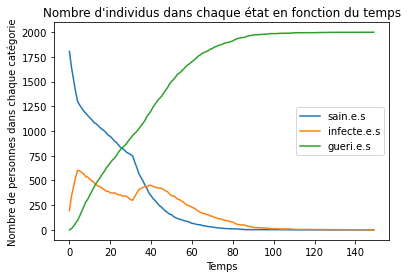

Sains :  0.0 % -- Infectés :  0.05 % -- Guéris :  99.95 %
Nombre d'invidus:  603 -- Le temps de production du pic :  4


In [74]:
conf = confinement(2000, 150, pi0, A2, A)
graphSIR(conf, 150)
proportion(conf, 150, 2000)
pic(conf,150,"I")

Le modèle ergodique A2 étant le confinement et le modèle de la matrice A étant le déconfinement sur une population moins large avec une distribution de probabilités initial différente de celle du confinement :

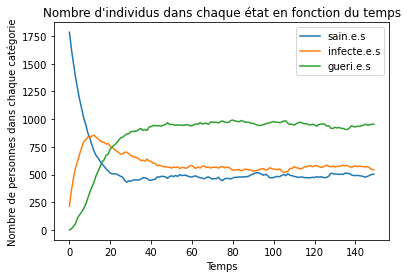

Sains :  25.2 % -- Infectés :  27.1 % -- Guéris :  47.7 %
Nombre d'invidus:  855 -- Le temps de production du pic :  12


In [75]:
confChaos = confinement(2000, 150, pi0, A1, A)
graphSIR(confChaos, 150)
proportion(confChaos, 150, 2000)
pic(confChaos,150,"I")

Le modèle ergodique A2 étant le confinement et le modèle de la matrice A étant le déconfinement sur une population moins large avec une distribution de probabilités initial différente de celle du confinement avec plus de temps pour bien observer :

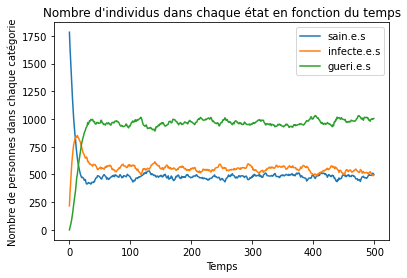

Sains :  25.1 % -- Infectés :  24.65 % -- Guéris :  50.25 %
Nombre d'invidus:  852 -- Le temps de production du pic :  13


In [76]:
confChaos = confinement(2000, 500, pi0, A1, A)
graphSIR(confChaos, 500)
proportion(confChaos, 500, 2000)
pic(confChaos,500,"I")

#### 2. Quelle remarque critique pouvez faire sur le modèle SIR ? Proposez-vous des améliorations ?

##### Remarque :
- Ce modèle ne prend pas en compte les personnes infectées non-infectieuses, qui ne sont donc pas contagieuses.
- Ce modèle ne tient pas en compte les décès. 
- Ce modèle oublie également que la population n'est pas homogène, notamment qu'il y a des catégories pour lesquelles la mortalité est plus élevée.
- Ce modèle ne prend pas en compte la distribution spatiale de l'épidémie - c'est-à-dire le fait qu'il puisse y avoir plus de personnes infectées dans une région que dans une autre, que l'épidémie puisse se diffuser d'une région à l'autre, etc. Des modèles plus sophistiqués permettent d'y remédier, mais plus un modèle est complexe, plus il sera difficile d'en connaître les paramètres.

##### Améliorations : 

Pour cette partie il nous faut Image du package Ipython.display et le package pydotplus
(pip3 install graphviz ;
pip3 install pydotplus ) 


In [10]:
from IPython.display import Image
import pydotplus

Fonction pour afficher des nouvelles chaines de markov 

In [24]:
__GRAPHPREAMBULE = 'digraph{margin="0,0";node [style=filled, color = black, fillcolor=lightgrey,fontsize=10,' \
                   'shape=circle,margin=0.05,width=0,height=0];'
def drawGraphHorizontal(arcs):
    """
    Dessine un graph (horizontalement) à partir d'une chaîne décrivant ses arcs (et noeuds)  (par exemple 'A->B;C->A')"
    
    *le parametre arcs: la chaîne contenant les arcs
    *le return: l'image représentant le graphe
    """
    
    graph = pydotplus.graph_from_dot_data(__GRAPHPREAMBULE + 'rankdir=LR;' + arcs + '}')
    return Image(graph.create_png())

Modèle SIR + Contaminé(les personnes infectées non-infectieuses) + Décès = SCIR-D:

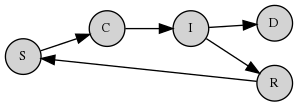

In [25]:
drawGraphHorizontal("S;S->C->I;I->R;I->D;R->S")

Nous allons aussi créer une simulation pour bien visualiser la propagation de l'épidemie sur le modèle SIR avec le confinement mais avec moins de complexité au niveau de probabilités et matrices de tranisitions, mais avec plus de précision au niveau de distribution spatial

Le modèle comprend des paramètres qui peuvent être modifiés pour jouer avec la simulation, tels que le nombre d'individus, la distance de transmission, la probabilité de transmission, etc. Il comporte également un mode confinement dans lequel il est possible de fixer certains points dans leur position initiale pendant toute la simulation (comme s'ils restaient chez eux).

Une classe Persona pour représenter un individu participant à la simulation. Chaque individu possède les attributs suivants :

    ID et nom : un numéro et un nom uniques utilisés à des fins d'identification.
    Statut : trois variables booléennes représentant si l'individu est Susceptible, Infecté ou Rétabli.
    Position : deux coordonnées représentant la position de l'individu dans chaque temps.
    Vitesse : la vitesse à laquelle l'individu se déplacera dans la zone de simulation.
    Temps de récupération : temps que l'individu met pour récupérer.
    Temps d'infection : le moment de la simulation où l'individu a été infecté.
    Fixe : un booléen qui indique si l'individu est en quarantaine.

Nous avons également défini certaines méthodes à utiliser tout au long de la simulation. Elles permettent de changer le statut de l'individu, d'obtenir et de fixer sa position, d'animer le mouvement image par image, de calculer la distance euclidienne à un autre point, etc. On les trouve commentées dans le code.


In [1]:
import math
import numpy as np


class Individual:
    def __init__(self,i, posx, posy, objx, objy, v, recover_time, fixedQuarantine):
        self.velociety = v
        self.objx = objx
        self.objy = objy
        self.idx = i
        self.name = "Individual " + str(i)
        self.infected = False
        self.susceptible = True
        self.removed = False
        self.posx = posx
        self.posy = posy
        self.fixedQuarantine = fixedQuarantine

        # déplacement chaque itération
        if self.fixedQuarantine or self.removed:
            self.deltax = 0
            self.deltay = 0
        else:
            self.deltax = (self.objx - self.posx) / self.velociety
            self.deltay = (self.objy - self.posy) / self.velociety
        # le temps dans lequel l'individu était infecté 
        self.infection_time = -1
        # temps dont l'infection dure (recovery time) 
        self.recover_time = recover_time

    def __str__(self):
        return self.name + " on position (" + str(self.posx) + ", " + str(self.posy) + ")"

    def infect(self, i):
        # infection
        self.infected = True
        self.susceptible = False
        self.removed = False
        self.infection_time = i

    def remove(self):
        # géuri/ enlève
        self.removed = True
        self.susceptible = False
        self.infected = False

    def move(self, objx, objy):
        # cette fionction a le but de crée une nouvelle position cible 
        self.objx = objx
        self.objy = objy
        if self.fixedQuarantine:
            self.deltax = 0
            self.deltay = 0
        else:
            self.deltax = (self.objx - self.posx) / self.velociety
            self.deltay = (self.objy - self.posy) / self.velociety

    def check_infection(self, i):
        # cette fonction est utilisé pour enlever l'indivud si le temps d'infection est passé (géuri)
        if self.infection_time > -1:
            if i - self.infection_time > self.recover_time:
                self.remove()

    def update_pos(self, n_posx, n_posy):
        # cette fontion anime les mouvements 
        if n_posx == 0 and n_posy == 0:
            self.posx = self.posx + self.deltax
            self.posy = self.posy + self.deltay
        else:
            self.posx = n_posx
            self.posy = n_posy

        if abs(self.posx-self.objx) < 3 and abs(self.posy-self.objy) < 3:
            self.move(np.random.random() * 100, np.random.random() * 100)
        if self.posx > 100:
            self.posx = 100
        if self.posy > 100:
            self.posy = 100
        if self.posx < 0:
            self.posx = 0
        if self.posy < 0:
            self.posy = 0

    def get_color(self):
        if self.infected:
            return 'red'
        if self.susceptible:
            return 'blue'
        if self.removed:
            return 'gray'

    def get_pos(self):
        return self.posx, self.posy

    def get_dist(self, x, y):
        # cette fonction calcule la distance entre cet individu et un autre individu
        return math.sqrt((self.posx-x)**2+(self.posy-y)**2)

Les paramètres de simulation suivants sont définis (lesquels vous pouvez modifer) :

    Nombre d'individus. Si le nombre est trop élevé (>500 dans mon PC), la simulation se déroulera très 
    lentement.
    Pourcentage d'individus infectés au début de la simulation.
    Rayon de transmission en pixels.
    Probabilité de transmission en pourcentage.
    Temps de récupération en nombre d'images
    Pourcentage de la population qui ne peut pas se déplacer (en quarantaine).

Tous les individus sont créés par la suite. Un diagramme de dispersion est créé et configuré pour accueillir les points en mouvement et un diagramme linéaire en 2D est créé et configuré pour afficher les courbes montrant la quantité d'infection et la quantité récupérée à chaque fois.

Enfin, Nous avons codé la fonction qui est exécutée en continu pour générer chaque image de l'animation. Elle vérifie combien de temps chaque individu a été malade, et s'il est actuellement infecté, elle recherche les personnes susceptibles dans le rayon de transmission pour les infecter en fonction de la probabilité de transmission et du R-Factor (la capacité de la maladie à se propager). Il calcule également la nouvelle position de chaque point dans la boîte, compte le nombre de personnes infectées et récupérées, et met à jour les informations sur le tracé de la ligne.


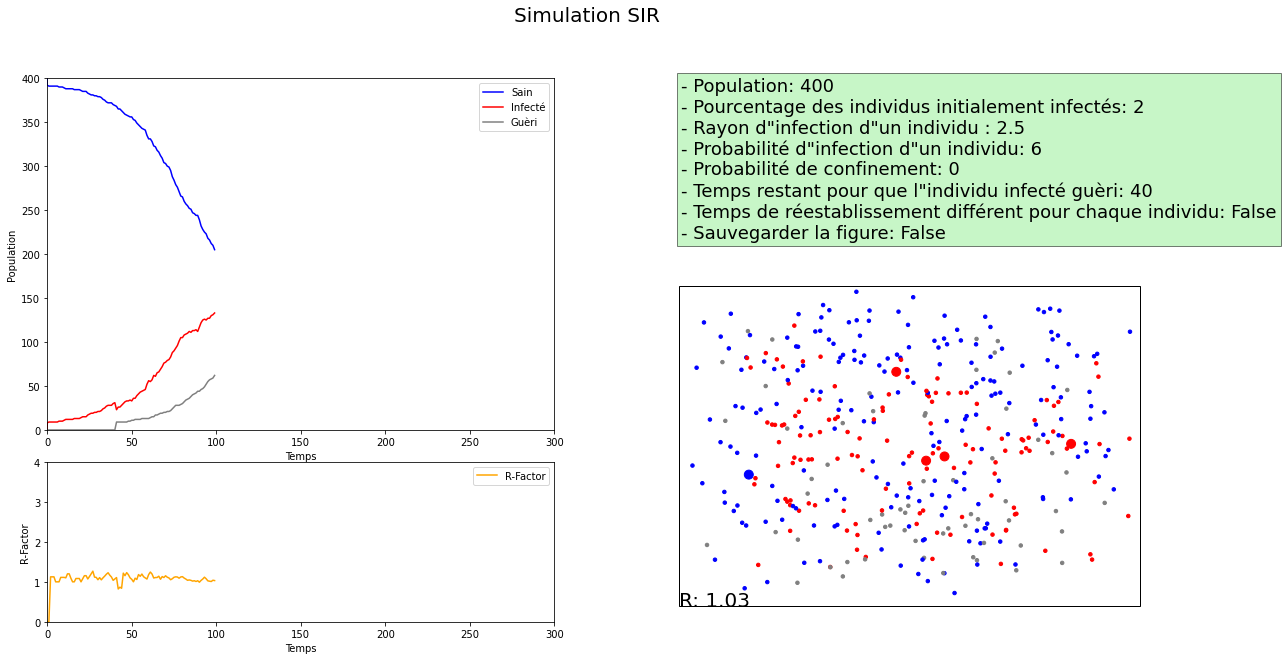

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import animation
from datetime import datetime
from IPython.display import HTML


class SIRSimulation:

    def __init__(self, n_individuals=400, prct_infected=2, r_infection=2.5,
                 p_infection=6, p_quarantine=0, t_recovery=40, different_recovery_times=False, save_figure=False,
                 simulation_mode=False):
        self.isRunning = False
        self.wasStarted = False
        self.simulation_mode = simulation_mode
        self.animation = None
        self.N_INDIVIDUALS = n_individuals  # nombre d'individus 
        self.PRCT_INFECTED = prct_infected  # pourcentage des individus infecté au début de la simulation (0-100%)
        self.INFECTION_RADIUS = r_infection  # rayon de transmission en pixel (0-100)
        self.INFECTION_PROBABILITY = p_infection  # pprobabilité d'infection en pourcentage (0-100%)
        self.P_QUARANTINE = p_quarantine  # pourcentage d'individus en confinement (0-100%)
        self.T_RECOVERY = t_recovery  # temps pour devenir guéri en nombre de frames (0-infinit)
        self.different_recovery_times = different_recovery_times  # temps de réetablissement aléatoire t pour chaque individu entre 1 and t_recovery
        self.save_figure = save_figure
        self.fig_path = os.path.join(os.getcwd(), 'figs')
        self.n_infected = 0
        self.current_r_list = [0.0]
        self.r_template_txt = 'R: {:.2f}'
        self.individuals = []
        self.list_r_txt = [self.r_template_txt.format(self.current_r_list[-1])]
        self.list_susceptible = [self.N_INDIVIDUALS]
        self.list_infected = [self.n_infected]
        self.list_removed = [0]
        self.list_time = [0]
        self.time = []
        self.iteration = []
        self._init_individuals()
        self._init_figure()

    def _init_individuals(self):
        # Creation de tout les individus dans des positions aléatoires et infectés quelque uns d'entre eux
        for i in range(self.N_INDIVIDUALS):
            # si True, échantillonner différentes probabilités d'infection pour chaque individu
            if self.different_recovery_times:
                if np.random.uniform(0, 1, 1) > 0.5:
                    recovery_time = np.random.randint(1, self.T_RECOVERY)
                else:
                    recovery_time = self.T_RECOVERY
            else:
                recovery_time = self.T_RECOVERY
            # Decider pour chaque individu s'il se confine en se basant sur la probabilité de confinement 
            if self.P_QUARANTINE > 0:
                prob_quarantine = np.random.choice(np.arange(0, 2), p=[1 - float(self.P_QUARANTINE / 100),
                                                                       float(self.P_QUARANTINE / 100)])
                prob_quarantine = bool(prob_quarantine)
            else:
                prob_quarantine = False

            p = Individual(i, np.random.random() * 100, np.random.random() * 100,
                           np.random.random() * 100, np.random.random() * 100,
                           (np.random.random() + 0.5) * 100, recovery_time, prob_quarantine)

            # Infecter chaque individu en se basant sur le pourcentage 
            if np.random.random() < self.PRCT_INFECTED / 100:
                p.infect(0)
                self.n_infected = self.n_infected + 1

            self.individuals.append(p)

    def _init_figure(self):
        # creation de tout les graphiques
        self.fig = plt.figure(figsize=(20, 10))
        self.gridspec = self.fig.add_gridspec(ncols=2, nrows=3)
        description = '- Population: {}\n'\
                      '- Pourcentage des individus initialement infectés: {}\n' \
                      '- Rayon d"infection d"un individu : {}\n' \
                      '- Probabilité d"infection d"un individu: {}\n' \
                      '- Probabilité de confinement: {}\n' \
                      '- Temps restant pour que l"individu infecté guèri: {}\n' \
                      '- Temps de réestablissement différent pour chaque individu: {}\n' \
                      '- Sauvegarder la figure: {}'.format(self.N_INDIVIDUALS,
                                                 self.PRCT_INFECTED,
                                                 self.INFECTION_RADIUS,
                                                 self.INFECTION_PROBABILITY,
                                                 self.P_QUARANTINE,
                                                 self.T_RECOVERY,
                                                 self.different_recovery_times,
                                                 self.save_figure)

        title = 'Simulation SIR'
        self.fig.suptitle(title, fontsize=20)
        self.fig.canvas.set_window_title('Simulation SIR')
        self.text_plot = self.fig.add_subplot(self.gridspec[0, 1])
        self.text_plot.text(0.05, 0, description, fontsize=18,  bbox=dict(facecolor='lightgreen', alpha=0.5))
        self.kpis_plot = self.fig.add_subplot(self.gridspec[0:-1, 0])  # first: row, second: column
        self.r_plot = self.fig.add_subplot(self.gridspec[-1, 0])
        self.population_scatter = self.fig.add_subplot(self.gridspec[1:, 1])
        self.population_scatter.axis('off')
        self.text_plot.axis('off')
        self.kpis_plot.axis([0, 300, 0, self.N_INDIVIDUALS])
        self.r_plot.axis([0, 300, 0, 4.0])
        self.scatter = self.population_scatter.scatter([p.posx for p in self.individuals],
                                                       [p.posy for p in self.individuals], c='blue', s=12)
        self.box = plt.Rectangle((0, 0), 100, 100, fill=False)
        self.population_scatter.add_patch(self.box)
        self.cvst, = self.kpis_plot.plot(self.n_infected, color="red", label="Infecté")
        self.rvst, = self.kpis_plot.plot(self.n_infected, color="gray", label="Guèri")
        self.svst, = self.kpis_plot.plot(self.n_infected, color='blue', label='Sain')
        self.r_line2d, = self.r_plot.plot(self.current_r_list[-1], color='orange', label='R-Factor')
        self.r_text_obj = self.population_scatter.text(0, 0, ' ', fontsize=20)

        self.kpis_plot.legend(handles=[self.svst, self.cvst, self.rvst])
        self.r_plot.legend(handles=[self.r_line2d])
        self.kpis_plot.set_xlabel("Temps")
        self.kpis_plot.set_ylabel("Population")
        self.r_plot.set_xlabel("Temps")
        self.r_plot.set_ylabel("R-Factor")

    def update(self, frame, removed, currently_infected, susceptible, t, current_r):
        # fonction executé frame by frame
        count_susceptible = self.N_INDIVIDUALS
        count_infected = 0
        count_removed = 0
        current_r_val = 0.0
        individual_colors = []
        individual_sizes = [12 for p in self.individuals]
        for p in self.individuals:
            # verifier combien de temps l'individu était infecté 
            p.check_infection(frame)
            # animer le mouvement de chaque individu 
            if not p.removed:
                p.update_pos(0, 0)
            if p.removed:
                count_removed += 1  # compter le nombre d'indivus guèris
                count_susceptible -= 1
            if p.infected:
                count_infected = count_infected + 1  # compter le nombre d'individus infectés
                count_susceptible -= 1
                # verifier s'il y a des gens autour de l'individu infecté et dans son rayon d'infection 
                # rayon de transmission en se basant sur la probabilité de transmission 
                for ind in self.individuals:
                    if ind.idx == p.idx or ind.infected or ind.removed:
                        pass
                    else:
                        d = p.get_dist(ind.posx, ind.posy)
                        if d < self.INFECTION_RADIUS:
                            if np.random.random() < self.INFECTION_PROBABILITY / 100:
                                ind.infect(frame)
                                individual_sizes[ind.idx] = 80

            individual_colors.append(p.get_color())  # changement de couleur de "point" au couleur qui correspond a son état 

        # calculons R-factor
        r_factor = 0.0
        if t[-1] != 0:
            r_factor = self._calculate_r_factor()

        self.r_text_obj.set_text(self.r_template_txt.format(r_factor))

        # mis a jour du plotting data
        currently_infected.append(count_infected)
        removed.append(count_removed)
        susceptible.append(count_susceptible)
        t.append(frame)
        current_r.append(r_factor)

        # verifier la fin
        self._check_for_termination(currently_infected)

        # transfere de data vers matplotlib graphics
        offsets = np.array([[p.posx for p in self.individuals], [p.posy for p in self.individuals]])
        self.scatter.set_offsets(np.ndarray.transpose(offsets))
        self.scatter.set_color(individual_colors)
        self.scatter.set_sizes(individual_sizes)
        self.cvst.set_data(t, currently_infected)
        self.rvst.set_data(t, removed)
        self.svst.set_data(t, susceptible)
        self.r_line2d.set_data(t, current_r)

        return self.scatter, self.cvst, self.rvst, self.svst, self.r_text_obj, self.r_line2d

    def save_fig(self):
        now = datetime.now().strftime('%Y%m%d')
        figname = "{}_Simulation_n_individuals_{}_prct_infected_{}_infection_radius_{}_infection_prob_{}" \
                  "_p_quarantine_{}_t_infected_{}_diff_recovery_times_{}.png".format(now, self.N_INDIVIDUALS,
                                                                                     self.PRCT_INFECTED,
                                                                                     self.INFECTION_RADIUS,
                                                                                     self.INFECTION_PROBABILITY,
                                                                                     self.P_QUARANTINE,
                                                                                     self.T_RECOVERY,
                                                                                     self.different_recovery_times)
        full_figname = os.path.join(self.fig_path, figname)
        self.fig.savefig(full_figname, dpi=400)
        print('[SIM] Saved figure: {}'.format(full_figname))

    def pause_simualtion(self):
        self.isRunning = False
        self.animation.event_source.stop()
        if self.save_figure:
            self.save_fig()
        if self.simulation_mode:
            self.fig.close()

    def continue_simulation(self):
        self.isRunning = True
        self.animation.event_source.start()

    def _check_for_termination(self, infected):
        if infected[-1] == 0:
            self.pause_simualtion()

    def _calculate_r_factor(self):
        r_divisor = self.list_infected[-4]
        r_dividend = self.list_infected[-1]
        r_factor = float(r_dividend / r_divisor)
        return r_factor

    def run(self):
        # execute l'animation 
        self.isRunning = True
        self.wasStarted = True
        self.anim = animation.FuncAnimation(self.fig, self.update, interval=25,
                                       fargs=(self.list_removed, self.list_infected, self.list_susceptible,
                                              self.list_time, self.current_r_list), blit=True)

        HTML(self.anim.to_jshtml())
        
        
sim = SIRSimulation()
sim.run()